In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Reading the data set
df=pd.read_csv("data_banknote_authentication .txt",header=None)

In [3]:
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


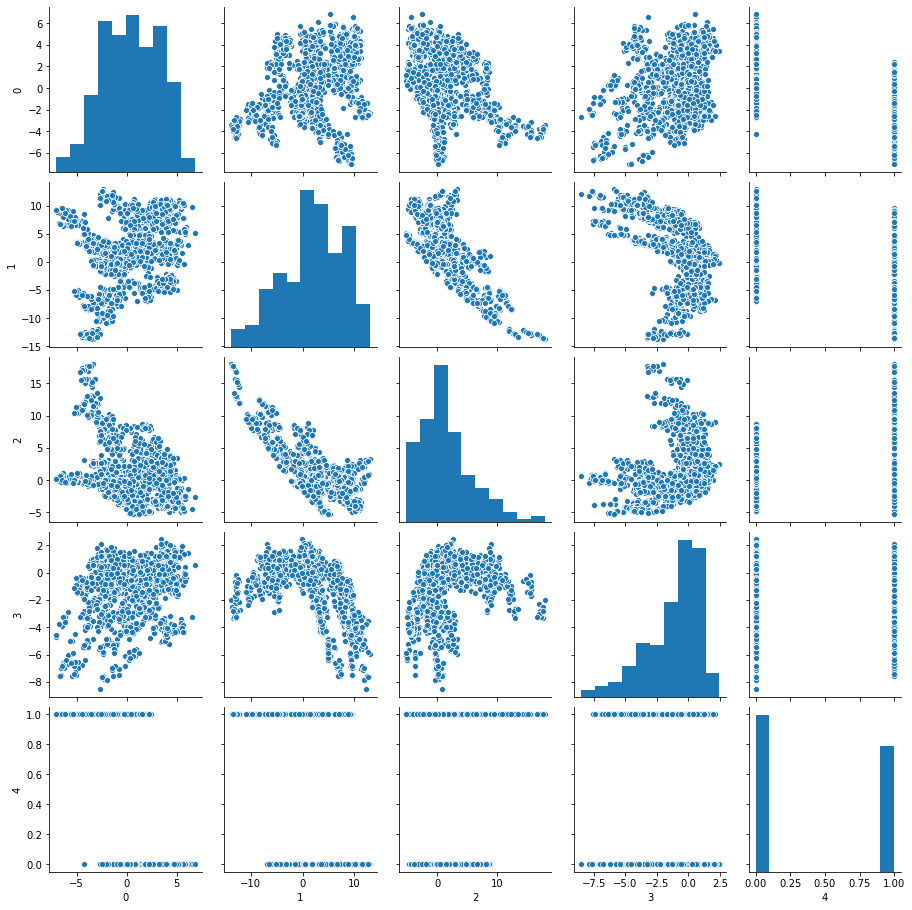

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,ytest=train_test_split(df.loc[:,:3],df[4],test_size=0.3,random_state=25)

In [7]:
from sklearn.ensemble import RandomForestClassifier as random

In [218]:
Estimators= random(n_estimators=12)

#  I have gone through Enhancing the Tree of Random Classifier 

## Estimators(12) is giving the Best Result After Checking the Tree nodes from 1 to 50

In [231]:
Estimators.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [232]:
estimated_values=Estimators.predict(Xtest)

In [233]:
result=accuracy_score(ytest,estimated_values)

In [234]:
print(result)

0.9975728155339806


In [235]:
result1=classification_report(ytest,estimated_values)

In [236]:
result2=confusion_matrix(ytest,estimated_values)

In [237]:
print(result)
print(result1)
print(result2)

0.9975728155339806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       0.99      1.00      1.00       187

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

[[224   1]
 [  0 187]]


In [238]:
print(result2)

[[224   1]
 [  0 187]]


# From the Above results
 **True Positive** : Correctly classified Values 187 
 **True Negatives**:Correctly Predicted Negative Values 223
 **False Positives**: Misclassified  Values 2
 **False Negatives**: Correctly Predicted False Negatives 0

In [239]:
ytest.value_counts()

0    225
1    187
Name: 4, dtype: int64

In [240]:
pd.set_option("display.max_colwidth", 150)

In [241]:
print('True:', ytest.values[0:115])
print('False:', estimated_values[0:115])

True: [1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 1 0]
False: [1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 1 0]


# From the above Results 
## <font color="red"> 2  Were Miss classified
## <font color="green">total 410 Are classified Correctly of 412


In [242]:
df.isnull()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False
